<h1 style="color: orange;  text-align: center;font-weight: bold; font-family: 'Arial', sans-serif;">TITANIC LIFE PREDICTION</h1>


The Titanic dataset is a well-known dataset in data science and machine learning that contains information about passengers on the RMS Titanic, including whether they survived or not. The dataset typically includes the following columns:


PassengerId: A unique identifier for each passenger.

Survived: Indicates whether the passenger survived (1) or not (0).

Pclass: The passenger's class (1st, 2nd, or 3rd).

Name: The passenger's name.

Sex: The passenger's gender (male or female).

Age: The passenger's age.

SibSp: The number of siblings or spouses aboard.

Parch: The number of parents or children aboard.

Ticket: The ticket number.

Fare: The ticket fare.

Cabin: The cabin number.

Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Here's a brief description of each column:


The Titanic dataset is often used for data analysis, data visualization, and machine learning tasks, such as predicting passenger survival based on the available features. You can explore various aspects of the dataset, including survival rates, age distributions, gender differences, and class disparities, to gain insights into the passengers on the Titanic.

## Data Preprocessing

First Import And Run Necessory Libraries With Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Creating DataFrame

In [2]:
df = pd.read_csv("titanic_data.csv") 
df.head()

,Unnamed: 0,PassengerId,Name,Ticket,Cabin,class,deck,sex,age,who,adult_male,fare_y,embark_town,pclass,alone,sibsp,parch,survived
0,0,1,"Braund, Mr. Owen Harris",A/5 21171,NaN,Third,NaN,male,22.0,man,True,7.2500,Southampton,3,False,1,0,0
1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,First,C,female,38.0,woman,False,71.2833,Cherbourg,1,False,1,0,1
2,2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,Third,NaN,female,26.0,woman,False,7.9250,Southampton,3,True,0,0,1
3,3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,First,C,female,35.0,woman,False,53.1000,Southampton,1,False,1,0,1
4,4,5,"Allen, Mr. William Henry",373450,NaN,Third,NaN,male,35.0,man,True,8.0500,Southampton,3,True,0,0,0


Dataset Description datatypes and present and absent values null values 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Name         891 non-null    object 
 3   Ticket       891 non-null    object 
 4   Cabin        204 non-null    object 
 5   class        891 non-null    object 
 6   deck         203 non-null    object 
 7   sex          891 non-null    object 
 8   age          714 non-null    float64
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  fare_y       891 non-null    float64
 12  embark_town  889 non-null    object 
 13  pclass       891 non-null    int64  
 14  alone        891 non-null    bool   
 15  sibsp        891 non-null    int64  
 16  parch        891 non-null    int64  
 17  survived     891 non-null    int64  
dtypes: bool(2), float64(2), int64(6), object(8)
memory

### Data Cleaning

Checking for null Values 

In [4]:
for index, value in zip(df.isnull().sum().index, df.isnull().sum()):
    print(f" ({index}, {value})",end=",")

 (Unnamed: 0, 0), (PassengerId, 0), (Name, 0), (Ticket, 0), (Cabin, 687), (class, 0), (deck, 688), (sex, 0), (age, 177), (who, 0), (adult_male, 0), (fare_y, 0), (embark_town, 2), (pclass, 0), (alone, 0), (sibsp, 0), (parch, 0), (survived, 0),

Drop Unnecessory Features

In [5]:
df.drop(columns=["Unnamed: 0","PassengerId","Name","Ticket","Cabin","deck","pclass"],inplace=True) 

In [6]:
df.rename(columns={"fare_y":"fare"},inplace=True)

Imputing Missing values

In [7]:
print("Null values of The Passengers Who are men in Age column    : ",df[df["who"] == "man"]["age"].isnull().sum())
print("Null values of The Passengers Who are Women in Age column  : ",df[df["who"] == "woman"]["age"].isnull().sum())
print("Null values of The Passengers Who are child in Age column  : ",df[df["who"] == "child"]["age"].isnull().sum())

print("\nMedian of Age of Men    : ",df[df["who"] == "man"]["age"].median())
print("Median of Age of Women  : ",df[df["who"] == "woman"]["age"].median())
print("Median of Age of child  : ",df[df["who"] == "child"]["age"].median())

Null values of The Passengers Who are men in Age column    :  124
Null values of The Passengers Who are Women in Age column  :  53
Null values of The Passengers Who are child in Age column  :  0

Median of Age of Men    :  30.0
Median of Age of Women  :  30.0
Median of Age of child  :  5.0


On Above Operations, We have Got That The Passenger who are man and Woman, there are some null values in age columns are present. so we have to fill null values only at the point of age where man and woman are present in corresponding "who" column 
The Median Values of Man and Woman ages are Same for the fill the nulll values 

In [8]:
df["age"].fillna(30,inplace=True)

Most Appearing Value For Which is mode Embarked Taws is Southampton, So we use it for fill null values 

In [9]:
df.embark_town.mode()
df["embark_town"].fillna("Southampton",inplace=True)

In [10]:
for index, value in zip(df.isnull().sum().index, df.isnull().sum()):
    print(f" ({index} : {value})",end=",")

 (class : 0), (sex : 0), (age : 0), (who : 0), (adult_male : 0), (fare : 0), (embark_town : 0), (alone : 0), (sibsp : 0), (parch : 0), (survived : 0),

## Exploratory Data Analysis : Data Visualisation 

Making Value Counts of Each Feature

In [11]:
class_cal_count = df["class"].value_counts()
sex_val_count = df["sex"].value_counts()
adult_male_count  = df["adult_male"].value_counts()
embark_town = df["embark_town"].value_counts()
who_count = df["who"].value_counts()
alone_ornot_count = df["alone"].value_counts()
parch_count = df["parch"].value_counts()
sibsp_count = df["sibsp"].value_counts()

In [12]:
import pandas as pd

# Assuming 'df' is your DataFrame with 'Embarked' and 'Survived' columns
survival_rate_by_embarked = df.groupby('embark_town')['survived'].mean()

print(survival_rate_by_embarked)


embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
Name: survived, dtype: float64


Plotting All Features Value Count Plots 
Plotting All Features Value Count With Hue of Survived Labels

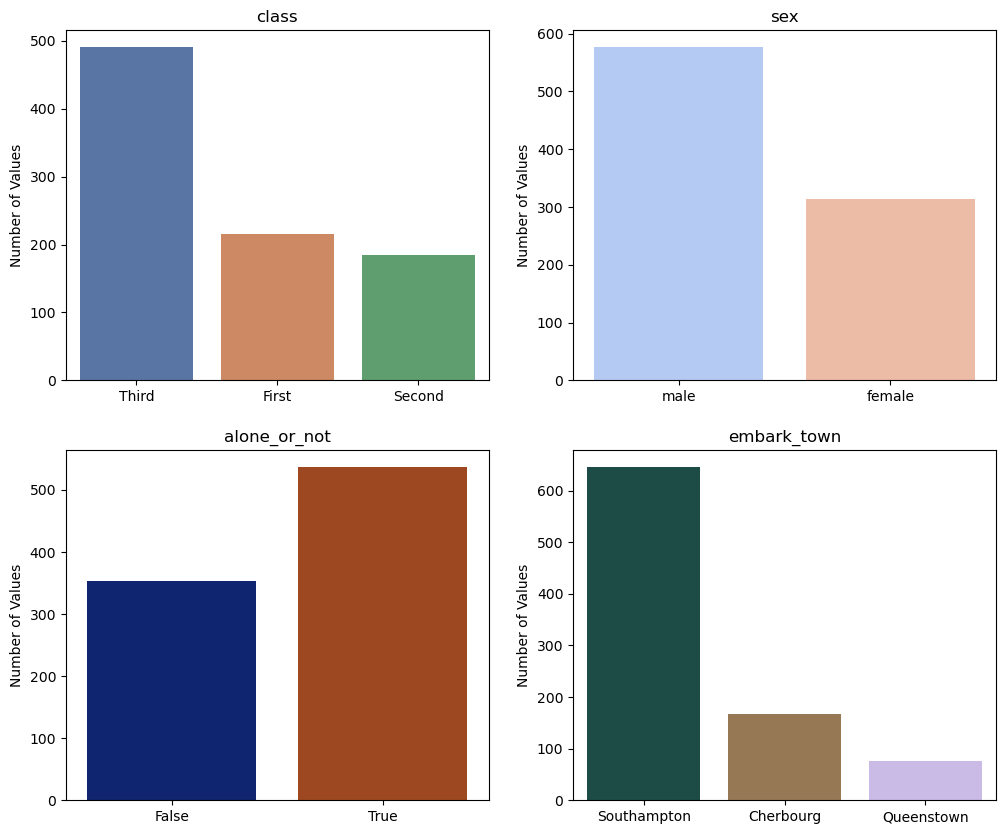

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Set titles for subplots
axs[0, 0].set_title('class')
axs[0, 1].set_title('sex')
axs[1, 0].set_title('alone_or_not')
axs[1, 1].set_title('embark_town')




# Customize the layout
sns.barplot(x=class_cal_count.index,y=class_cal_count.values,ax=axs[0,0], palette= "deep")
axs[0,0].set_ylabel("Number of Values")
sns.barplot(x=sex_val_count.index,y=sex_val_count.values,ax=axs[0,1],palette="coolwarm")
axs[0,1].set_ylabel("Number of Values")
sns.barplot(x=alone_ornot_count.index,y=alone_ornot_count.values,ax=axs[1,0],palette="dark")
axs[1,0].set_ylabel("Number of Values")
sns.barplot(x=embark_town.index,y=embark_town.values,ax=axs[1,1],palette="cubehelix")
axs[1,1].set_ylabel("Number of Values")



fig.show()

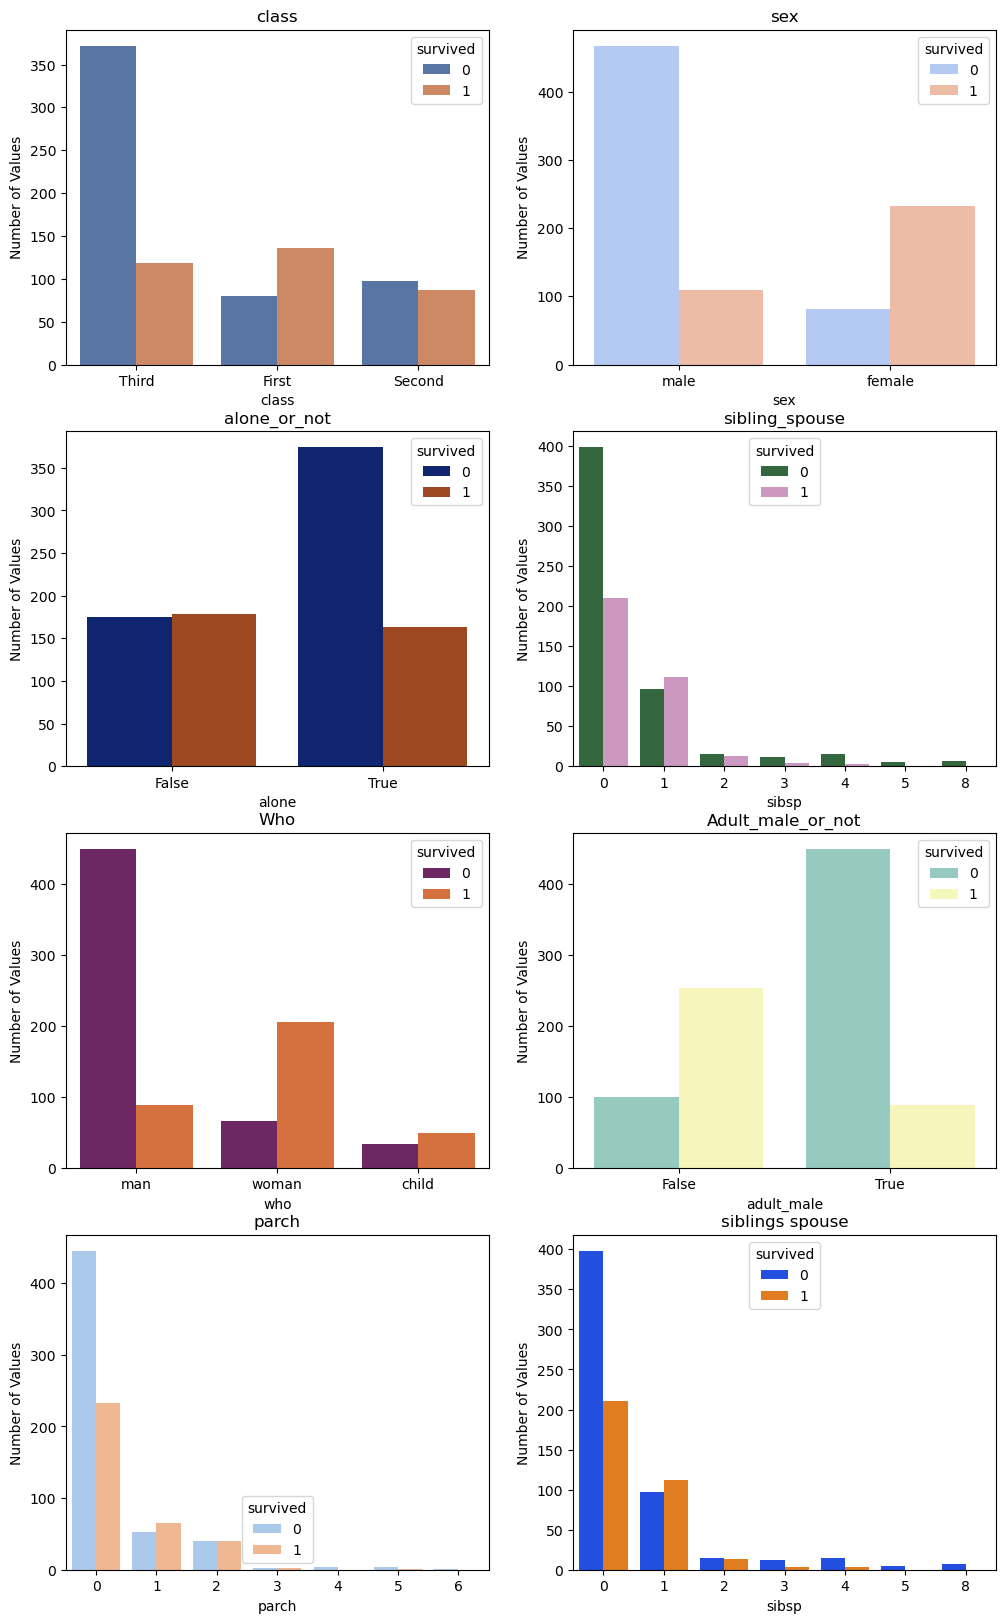

In [87]:
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

axs[0, 0].set_title('class')
axs[0, 1].set_title('sex')
axs[1, 0].set_title('alone_or_not')
axs[1, 1].set_title('sibling_spouse')

sns.countplot(data=df ,x= "class",hue = "survived",ax=axs[0,0], palette= "deep")
axs[0,0].set_ylabel("Number of Values")
sns.countplot(data=df ,x= "sex",hue = "survived",ax=axs[0,1],palette="coolwarm")
axs[0,1].set_ylabel("Number of Values")
sns.countplot(data=df ,x= "alone",hue = "survived",ax=axs[1,0],palette="dark")
axs[1,0].set_ylabel("Number of Values")
sns.countplot(data=df ,x= "sibsp",hue = "survived",ax=axs[1,1],palette="cubehelix")
axs[1,1].set_ylabel("Number of Values")


axs[2, 0].set_title('Who')
axs[2, 1].set_title('Adult_male_or_not')
axs[3, 0].set_title('parch')
axs[3, 1].set_title('siblings spouse')

sns.countplot(data=df ,x= "who",hue = "survived",ax=axs[2,0],palette="inferno")
axs[2,0].set_ylabel("Number of Values")
sns.countplot(data=df ,x= "adult_male",hue = "survived",ax=axs[2,1],palette="Set3")
axs[2,1].set_ylabel("Number of Values")
sns.countplot(data=df ,x= "parch",hue = "survived",ax=axs[3,0],palette="pastel")
axs[3,0].set_ylabel("Number of Values")
sns.countplot(data=df ,x= "sibsp",hue = "survived",ax=axs[3,1],palette="bright")
axs[3,1].set_ylabel("Number of Values")

fig.show()

New Feature Adding 

In [14]:
df["family"] = df["parch"] + df["sibsp"] + 1

In [16]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [15]:
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-300', '300+']
df['FareGroup'] = pd.cut(df['fare'], bins=bins, labels=labels)


In [17]:
df['FareCategory'] = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   class         891 non-null    object  
 1   sex           891 non-null    object  
 2   age           891 non-null    float64 
 3   who           891 non-null    object  
 4   adult_male    891 non-null    bool    
 5   fare          891 non-null    float64 
 6   embark_town   891 non-null    object  
 7   alone         891 non-null    bool    
 8   sibsp         891 non-null    int64   
 9   parch         891 non-null    int64   
 10  survived      891 non-null    int64   
 11  family        891 non-null    int64   
 12  FareGroup     876 non-null    category
 13  ageGroup      891 non-null    category
 14  FareCategory  891 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.9+ KB


In [21]:
df = df.iloc[:,[0,1,2,4,5,6,7,8,9,11,13,14,10]]

In [22]:
df

,class,sex,age,adult_male,fare,embark_town,alone,sibsp,parch,family,ageGroup,FareCategory,survived
0,Third,male,22.0,True,7.2500,Southampton,False,1,0,2,Young Adult,Low,0
1,First,female,38.0,False,71.2833,Cherbourg,False,1,0,2,Adult,Very High,1
2,Third,female,26.0,False,7.9250,Southampton,True,0,0,1,Young Adult,Medium,1
3,First,female,35.0,False,53.1000,Southampton,False,1,0,2,Adult,Very High,1
4,Third,male,35.0,True,8.0500,Southampton,True,0,0,1,Adult,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Second,male,27.0,True,13.0000,Southampton,True,0,0,1,Young Adult,Medium,0
887,First,female,19.0,False,30.0000,Southampton,True,0,0,1,Young Adult,High,1
888,Third,female,30.0,False,23.4500,Southampton,False,1,2,4,Young Adult,High,0
889,First,male,26.0,True,30.0000,Cherbourg,True,0,0,1,Young Adult,High,1


## Feature Engineering : Feature transformation

In [26]:
embark_town_list = ["Southampton","Queenstown","Cherbourg"]
class_list = ["Third","Second","First"]
sex_list = ["male","female"]
age_group_list = ["Senior","Young Adult","Adult","Teenager","Child"]
fare_cat_list = ["Low","Medium","High","Very_High"]

In [49]:
df.corr()

,age,adult_male,fare,alone,sibsp,parch,family,survived
age,1.000000,0.254145,0.090632,0.181165,-0.232440,-0.180330,-0.248954,-0.070657
adult_male,0.254145,1.000000,-0.182024,0.404744,-0.253586,-0.349943,-0.348143,-0.557080
fare,0.090632,-0.182024,1.000000,-0.271832,0.159651,0.216225,0.217138,0.257307
alone,0.181165,0.404744,-0.271832,1.000000,-0.584471,-0.583398,-0.690922,-0.203367
sibsp,-0.232440,-0.253586,0.159651,-0.584471,1.000000,0.414838,0.890712,-0.035322
parch,-0.180330,-0.349943,0.216225,-0.583398,0.414838,1.000000,0.783111,0.081629
family,-0.248954,-0.348143,0.217138,-0.690922,0.890712,0.783111,1.000000,0.016639
survived,-0.070657,-0.557080,0.257307,-0.203367,-0.035322,0.081629,0.016639,1.000000


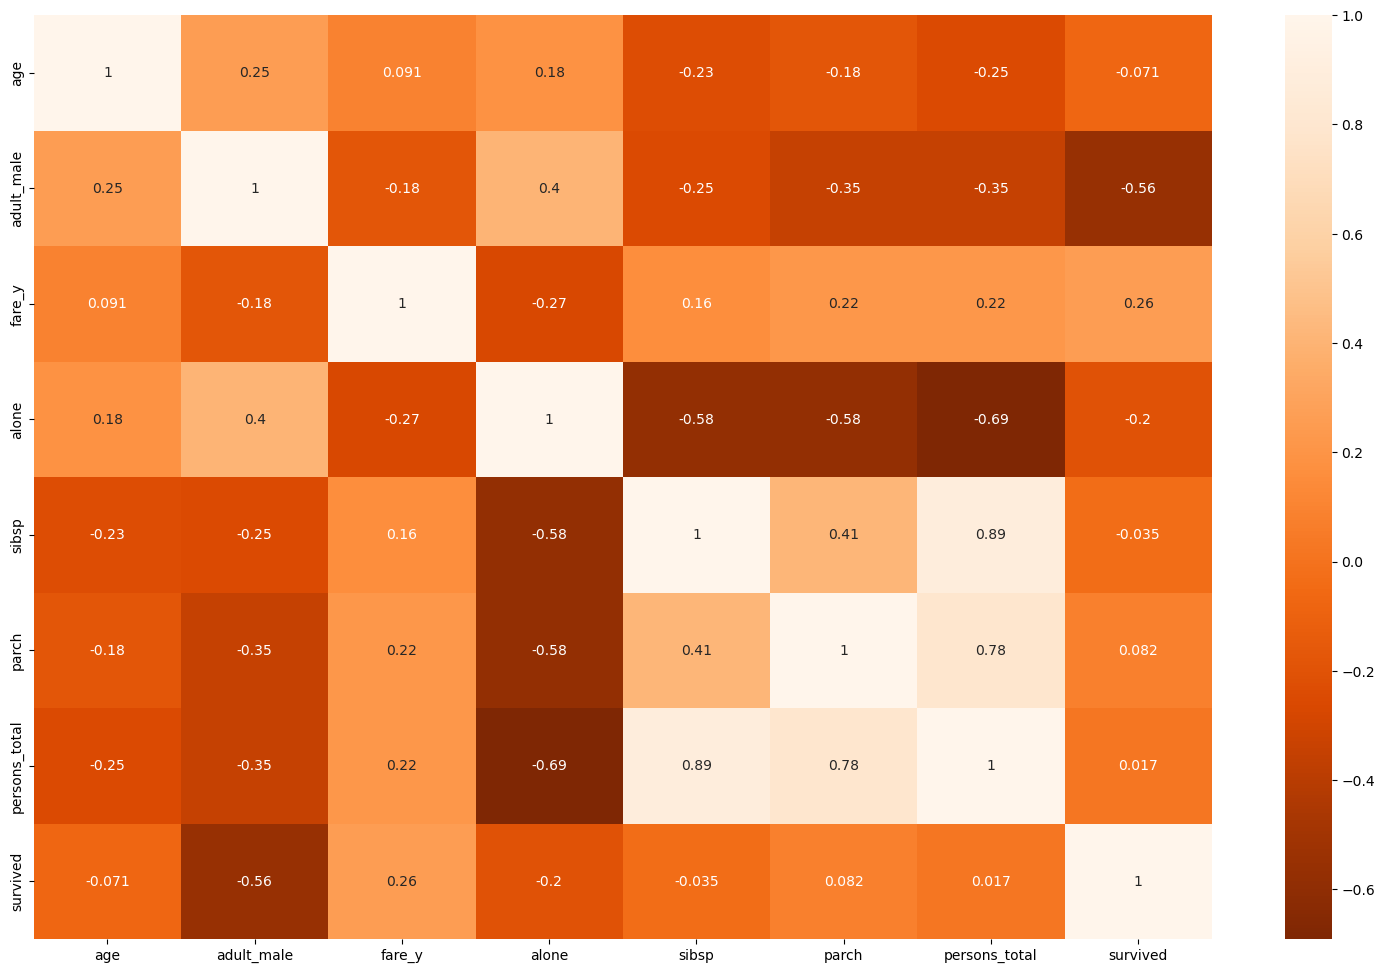

In [78]:
plt.figure(figsize=(19,12))
sns.heatmap(df.corr(),annot=True,cmap="Oranges_r")
plt.show()

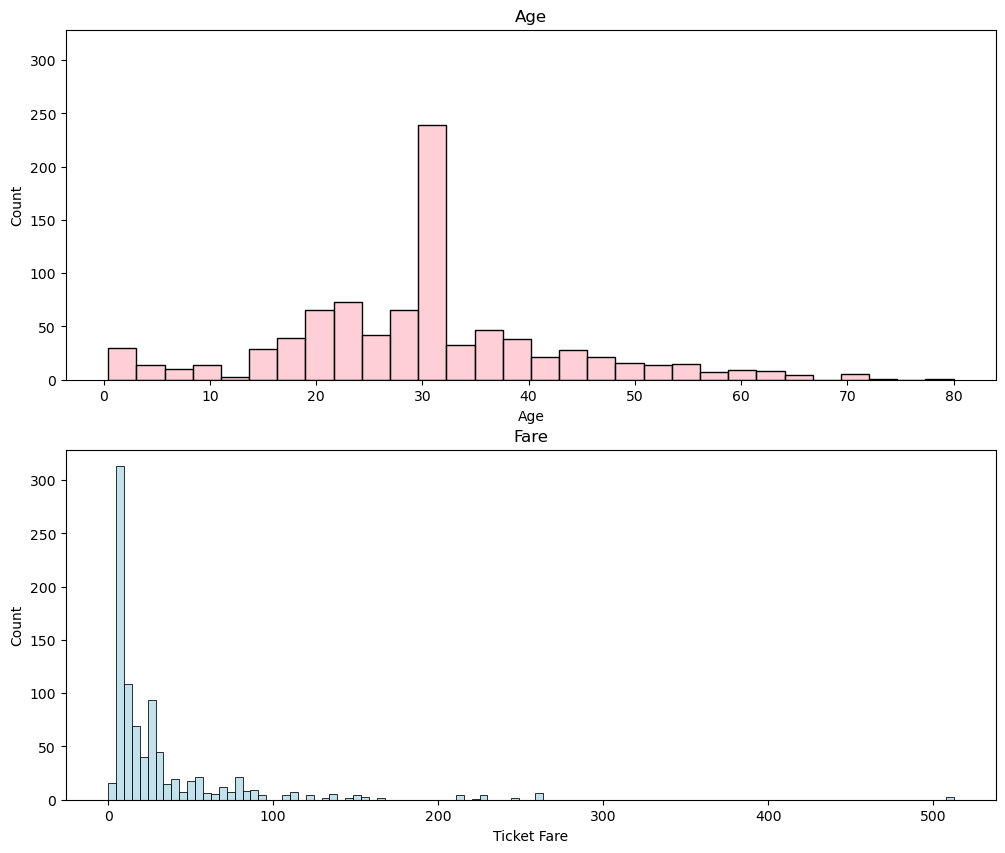

In [79]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10),sharey="all")

# Set titles for subplots
axs[0].set_title('Age')
axs[1].set_title('Fare')


# Customize the layout
sns.histplot(data=df, x="age",ax=axs[0], color= "pink")
axs[0].set_xlabel("Age")

sns.histplot(data=df, x="fare_y",ax=axs[1], color= "lightblue")
axs[1].set_xlabel("Ticket Fare")

fig.show()

In [50]:
df.corr()["survived"].sort_values(ascending=False)

survived      1.000000
fare          0.257307
parch         0.081629
family        0.016639
sibsp        -0.035322
age          -0.070657
alone        -0.203367
adult_male   -0.557080
Name: survived, dtype: float64

### Cleaned Dataframe

In [118]:
df.to_csv("titanic_read.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [211]:
df = pd.read_csv("titanic_read.csv")
df.drop(columns=["Unnamed: 0"],inplace=True)
df

,class,sex,age,who,adult_male,fare_y,embark_town,alone,sibsp,parch,persons_total,survived
0,Third,male,22.0,man,True,7.2500,Southampton,False,1,0,2,0
1,First,female,38.0,woman,False,71.2833,Cherbourg,False,1,0,2,1
2,Third,female,26.0,woman,False,7.9250,Southampton,True,0,0,1,1
3,First,female,35.0,woman,False,53.1000,Southampton,False,1,0,2,1
4,Third,male,35.0,man,True,8.0500,Southampton,True,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,Second,male,27.0,man,True,13.0000,Southampton,True,0,0,1,0
887,First,female,19.0,woman,False,30.0000,Southampton,True,0,0,1,1
888,Third,female,30.0,woman,False,23.4500,Southampton,False,1,2,4,0
889,First,male,26.0,man,True,30.0000,Cherbourg,True,0,0,1,1


## Model Selection, Feature Scaling And Spliting The Data

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, balanced_accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [213]:
transformers = ColumnTransformer(
    transformers=[
    ("category",OneHotEncoder(sparse=False,handle_unknown="ignore"),[0,1,3,4,6,7]),
    ("scale",MinMaxScaler(),[2,5,8,9,10])
],remainder="passthrough")

In [19]:
df = transformers.fit_transform(df)[0]

NameError: name 'transformers' is not defined

In [215]:
# Spliting The Into Features and Labels , and after that into a training and testing data
# Scaling The Data with Standard and MinMax both Scalers For Performance Checking Purpose 
X = df[:,:-1]
y = df[:,-1]

print("X  : ", X.shape)
print("y  : ", y.shape)


X  :  (891, 20)
y  :  (891,)


In [216]:
df[0]

array([0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.27117366, 0.01415106, 0.125     , 0.        , 0.1       ,
       0.        ])

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(712, 20)
(179, 20)
(712,)
(179,)


## Model Training,  Testing And Prediction

#### Making Class For Performace and Score of Model 

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [220]:
class Performance:

    def __init__(self):
        self.Classifier_name = ""
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
        self.y_pred = None
        self.classifier = None

    def Scores(self):
        print("Classifier                       : ", self.Classifier_name)
        print("-------------------------------------------------------------------------------------")
        print("Best Score of The Classifier   : ", self.classifier.best_score_)
        print("-------------------------------------------------------------------------------------")
        print("Best Estimators Values         : ",
              self.classifier.best_estimator_)
        print("-------------------------------------------------------------------------------------")
        print("Best Parameters of Classifier  : ",
              self.classifier.best_params_)
        print("-------------------------------------------------------------------------------------")
        print("Total Time For Training        : ",
              end-start, "in minute", (end-start)/60)
        print("-------------------------------------------------------------------------------------")
        print("Classifier          : ", self.classifier.best_estimator_.fit(
            self.X_train, self.y_train))
        print("-------------------------------------------------------------------------------------")
        print("Score Of The Classifier          : ",
              self.classifier.best_estimator_.score(self.X_train, self.y_train))
        print("-------------------------------------------------------------------------------------")
        print("Classification Report            : \n",
              classification_report(self.y_test, self.y_pred))
        print("-------------------------------------------------------------------------------------")
        print("Accuracy Score of The Classifier :",
              accuracy_score(self.y_test, self.y_pred))
        print("-------------------------------------------------------------------------------------")
        print("R2 Score of The Classifier       : ",
              r2_score(self.y_test, self.y_pred))
        print("-------------------------------------------------------------------------------------")
        print("Confusion Matrix                 : \n",
              confusion_matrix(self.y_test, self.y_pred))
        print("-------------------------------------------------------------------------------------")
        df = pd.DataFrame(self.classifier.cv_results_).sort_values(
            "rank_test_score").head(3)["mean_test_score"]
        print(df)
        print("-------------------------------------------------------------------------------------")

### Logistic Regression

In [221]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [223]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr_cl = cross_val_score(lr_clf, X_train, y_train, cv=kf, scoring="accuracy")
print("Scores : ", lr_cl)
print("Mean Score :", lr_cl.mean())

print("-------------------------------------------------------------------------------------")
print("Classification Report            : \n",classification_report(y_test, lr_pred))
print("-------------------------------------------------------------------------------------")
print("Accuracy Score of The Classifier :",accuracy_score(y_test, lr_pred))
print("-------------------------------------------------------------------------------------")
print("R2 Score of The Classifier       : ",r2_score(y_test, lr_pred))
print("-------------------------------------------------------------------------------------")
print("Confusion Matrix                 : \n",confusion_matrix(y_test,lr_pred))
print("-------------------------------------------------------------------------------------")


Scores :  [0.82517483 0.81118881 0.79577465 0.83802817 0.83802817]
Mean Score : 0.8216389244558258
-------------------------------------------------------------------------------------
Classification Report            : 
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       105
         1.0       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

-------------------------------------------------------------------------------------
Accuracy Score of The Classifier : 0.8156424581005587
-------------------------------------------------------------------------------------
R2 Score of The Classifier       :  0.23976833976833978
-------------------------------------------------------------------------------------
Confusion Matrix                 : 
 [[92 13]
 [20 54]]
---------------------------

### Support Vector Classifier

In [224]:
param_grid = {
    'C': [5,7,9,10,15],
    'kernel': ['linear',"rbf","poly"],
    'gamma': ['auto'],
    'degree': [0.1,0.01,0.5]
}

svc = SVC() 
svc_classifier = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

In [228]:
import time
start = time.time()
print(svc_classifier.fit(X_train,y_train))
end   = time.time()

y_pred_svc = svc_classifier.predict(X_test)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [5, 7, 9, 10, 15], 'degree': [0.1, 0.01, 0.5],
                         'gamma': ['auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')


In [229]:

svc_c = Performance()

svc_c.Classifier_name = "Support Vector Classifier"
svc_c.X_train = X_train
svc_c.X_test = X_test
svc_c.y_train = y_train
svc_c.y_test = y_test
svc_c.y_pred = y_pred_svc
svc_c.classifier = svc_classifier


svc_c.Scores()

Classifier                       :  Support Vector Classifier
-------------------------------------------------------------------------------------
Best Score of The Classifier   :  0.8244262779474048
-------------------------------------------------------------------------------------
Best Estimators Values         :  SVC(C=7, degree=0.1, gamma='auto')
-------------------------------------------------------------------------------------
Best Parameters of Classifier  :  {'C': 7, 'degree': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
-------------------------------------------------------------------------------------
Total Time For Training        :  4.507898807525635 in minute 0.07513164679209391
-------------------------------------------------------------------------------------
Classifier          :  SVC(C=7, degree=0.1, gamma='auto')
-------------------------------------------------------------------------------------
Score Of The Classifier          :  0.8300561797752809
-------------

### Decision Tree Classifier

In [230]:
Dt_model  = DecisionTreeClassifier()

In [231]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,25,50,100],
    'min_samples_split': [5,10,15,20,50],
    'min_samples_leaf': [5,10,15,20,50],
    'max_leaf_nodes' : [5,10,20,50],
    'ccp_alpha' : [0.01,0.1],
    'min_impurity_decrease' : [0.01,0.05,0.1]

}


dt_clf = GridSearchCV(Dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [232]:
start = time.time()
dt_clf.fit(X_train,y_train)
end = time.time()

In [233]:
y_pred_dt = dt_clf.best_estimator_.predict(X_test)

In [239]:

dt_c = Performance()

dt_c.Classifier_name = "Decision Tree Classifier"
dt_c.X_train = X_train
dt_c.X_test = X_test
dt_c.y_train = y_train
dt_c.y_test = y_test
dt_c.y_pred = y_pred_dt
dt_c.classifier = dt_clf


dt_c.Scores()

Classifier                       :  Decision Tree Classifier
-------------------------------------------------------------------------------------
Best Score of The Classifier   :  0.8300305328474341
-------------------------------------------------------------------------------------
Best Estimators Values         :  DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_leaf_nodes=5, min_impurity_decrease=0.01,
                       min_samples_leaf=5, min_samples_split=5)
-------------------------------------------------------------------------------------
Best Parameters of Classifier  :  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 5}
-------------------------------------------------------------------------------------
Total Time For Training        :  372.07753896713257 in minute 6.201292316118876
----------------------------

### Random Forest Classifier

In [236]:
rf_model = RandomForestClassifier()

In [237]:
param_grid = {
    'criterion': ["gini","entropy"],
    'n_estimators': [10,20,25,30,50],
    'max_depth': [5,10,15,20],
    'min_samples_split': [5,10,15,20],
    'min_samples_leaf': [5,10,15,20],
    'max_leaf_nodes' : [10,20,50,100],
    'min_impurity_decrease' : [0.01,0.05,0.1]
}

rf_clf = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)



In [238]:
start = time.time()
rf_clf.fit(X_train,y_train)
end = time.time()


In [240]:
rfc_pred = rf_clf.best_estimator_.predict(X_test)

In [241]:

rf_c = Performance()

rf_c.Classifier_name = "Random Forest Classifier"
rf_c.X_train = X_train
rf_c.X_test = X_test
rf_c.y_train = y_train
rf_c.y_test = y_test
rf_c.y_pred = rfc_pred
rf_c.classifier = rf_clf


rf_c.Scores()

Classifier                       :  Random Forest Classifier
-------------------------------------------------------------------------------------
Best Score of The Classifier   :  0.8356853289839142
-------------------------------------------------------------------------------------
Best Estimators Values         :  RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=30)
-------------------------------------------------------------------------------------
Best Parameters of Classifier  :  {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 30}
-------------------------------------------------------------------------------------
Total Time For Training        :  372.07753896713257 in minute 6.201292316118876
----------------------

### Gradient Boosting Classifier

In [242]:
from sklearn.ensemble import GradientBoostingClassifier

In [243]:
model_gbr = GradientBoostingClassifier()

In [244]:
param_grid = {
    'n_estimators': [10,12,13,15],          
    'learning_rate': [0.01, 0.1],       
    'max_depth': [3, 5,9, 10],                 
    'min_samples_split': [10,12,15],         
    'min_samples_leaf': [5,8,10,15],           
    'criterion': ['friedman_mse'],
    'min_impurity_decrease': [0.0, 0.01],   
}

In [245]:
gbr_clf = GridSearchCV(model_gbr,param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [246]:
start = time.time()
gbr_clf.fit(X_train,y_train)
end = time.time()

In [247]:
gbr_pred = gbr_clf.best_estimator_.predict(X_test)

In [281]:

gbr_c = Performance()

gbr_c.Classifier_name = "Gradient Boosting Classifier"
gbr_c.X_train = X_train
gbr_c.X_test = X_test
gbr_c.y_train = y_train
gbr_c.y_test = y_test
gbr_c.y_pred = gbr_pred
gbr_c.classifier = gbr_clf


gbr_c.Scores()

Classifier                       :  Gradient Boosting Classifier
-------------------------------------------------------------------------------------
Best Score of The Classifier   :  0.8356544863587118
-------------------------------------------------------------------------------------
Best Estimators Values         :  GradientBoostingClassifier(max_depth=5, min_samples_leaf=8,
                           min_samples_split=15, n_estimators=15)
-------------------------------------------------------------------------------------
Best Parameters of Classifier  :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 15}
-------------------------------------------------------------------------------------
Total Time For Training        :  2.615246295928955 in minute 0.043587438265482586
-------------------------------------------------------------------------------------
Classifie

### K Neighbors Classifier

In [249]:
from sklearn.neighbors import KNeighborsClassifier
knn_c = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1,2,5,10,15,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'p': [1,2,5,10,15,20],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1,2,5,10,15,20],  
    'n_jobs': [-1] 
}


knn_clf = GridSearchCV(knn_c, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [250]:
start = time.time()
knn_clf.fit(X_train, y_train)
end = time.time()

In [251]:
knn_pred = knn_clf.best_estimator_.predict(X_test)

In [252]:

knn_c = Performance()

knn_c.Classifier_name = "K Neighbors Classifier"
knn_c.X_train = X_train
knn_c.X_test = X_test
knn_c.y_train = y_train
knn_c.y_test = y_test
knn_c.y_pred = knn_pred
knn_c.classifier = knn_clf


knn_c.Scores()

Classifier                       :  K Neighbors Classifier
-------------------------------------------------------------------------------------
Best Score of The Classifier   :  0.8286417807544566
-------------------------------------------------------------------------------------
Best Estimators Values         :  KNeighborsClassifier(leaf_size=1, metric='manhattan', n_jobs=-1, n_neighbors=20,
                     p=1)
-------------------------------------------------------------------------------------
Best Parameters of Classifier  :  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
-------------------------------------------------------------------------------------
Total Time For Training        :  125.78092670440674 in minute 2.096348778406779
-------------------------------------------------------------------------------------
Classifier          :  KNeighborsClassifier(leaf_size=1, metric='manhattan', n

### XGBoost Classifier

In [253]:
from xgboost import XGBClassifier

In [254]:
xgb_cl = XGBClassifier()

In [255]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [10,50,100],
    'max_depth': [5, 10 , 50, 100],
    "min_child_weight": [1,5,10],
    "gamma" : [0,0.1,1.0],           
}

xgb_clf = GridSearchCV(xgb_cl, param_grid, cv=5)

In [256]:
start = time.time()
xgb_clf.fit(X_train, y_train)
end   = time.time()

In [257]:
xgb_pred = xgb_clf.best_estimator_.predict(X_test)

In [258]:
xgb_clssifier = Performance()
xgb_clssifier.X_train = X_train
xgb_clssifier.X_test  = X_test
xgb_clssifier.y_train = y_train
xgb_clssifier.y_test  = y_test
xgb_clssifier.y_pred  = xgb_pred
xgb_clssifier.classifier = xgb_clf
xgb_clssifier.Classifier_name = " XGBoost Classifier "

xgb_clssifier.Scores()

Classifier                       :   XGBoost Classifier 
-------------------------------------------------------------------------------------
Best Score of The Classifier   :  0.8384713877671623
-------------------------------------------------------------------------------------
Best Estimators Values         :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=No

In [259]:
from sklearn.ensemble import VotingClassifier

param_grid = {
    'voting': ['hard', 'soft'],
    'weights': [None, [1, 1, 1], [2, 1, 1], [1, 2, 1]],
}

In [260]:
voting_clf = GridSearchCV(VotingClassifier(estimators=[
    ('svm_cl', svc_classifier.best_estimator_),
    ('dt_cl', dt_clf.best_estimator_),
    ('rf_cl', rf_clf.best_estimator_)
]), param_grid, cv=5)

In [261]:
start = time.time()
voting_clf.fit(X_train, y_train)
end = time.time()

In [262]:
voting_pred = voting_clf.best_estimator_.predict(X_test)

In [263]:
vot_classifier = Performance()
vot_classifier.X_train = X_train
vot_classifier.X_test  = X_test
vot_classifier.y_train = y_train
vot_classifier.y_test  = y_test
vot_classifier.Classifier_name = "Voting Classifier"
vot_classifier.classifier = voting_clf
vot_classifier.y_pred  = voting_pred
vot_classifier.Scores()

Classifier                       :  Voting Classifier
-------------------------------------------------------------------------------------
Best Score of The Classifier   :  0.832837584950261
-------------------------------------------------------------------------------------
Best Estimators Values         :  VotingClassifier(estimators=[('svm_cl', SVC(C=7, degree=0.1, gamma='auto')),
                             ('dt_cl',
                              DecisionTreeClassifier(ccp_alpha=0.01,
                                                     criterion='entropy',
                                                     max_depth=5,
                                                     max_leaf_nodes=5,
                                                     min_impurity_decrease=0.01,
                                                     min_samples_leaf=5,
                                                     min_samples_split=5)),
                             ('rf_cl',
                       

## Pipeline 

In [291]:
transformers_1 = XGBClassifier(gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, )

In [302]:
df = pd.read_csv("titanic_read.csv")
df.drop(columns=["Unnamed: 0"],inplace= True)


In [303]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [304]:
from sklearn.pipeline import make_pipeline,Pipeline

In [305]:
pipe = make_pipeline(transformers,transformers_1)

In [306]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 6, 7]),
                                                 ('scale', MinMaxScaler(),
                                                  [2, 5, 8, 9, 10])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=...
                               feature_types=None, gamma=0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

In [307]:
pipe.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [296]:
from sklearn import set_config
set_config(display='diagram')

## Result and Prediction

Almost All Machine Learning Models Performs Well and Gives Accuracy Between 80 to 85% Which is Better for the Prediction

Accuracy of The Models as follows :

Gradient Boosting Classifier : 83.98 %

XGBoost classfier : 83.84 % 

Decision Tree Classifier : 82.72 %

Random Forest Classifier : 83.43 %

Support Vector Classifier : 83.14 %

Voting Classifier : 83.00 %

Logistic Regression   : 82.12 %

K Neighbors Classifier : 77.38 %




In [1]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))

NameError: name 'pipe' is not defined

### prediction and result

In [2]:
pipe = pickle.load(open("pipe.pkl","rb"))

In [15]:
class prediction:
    
    def __init__(self):
        


        self.class_       = None
        self.sex          = None
        self.age          = None
        self.who          = None
        self.adult_male   = None
        self.fare         = None
        self.embark_town  = None
        self.alone        = None
        self.sibsp        = None
        self.parch        = None
        self.person_total = None
        self.survived     = None
        self.passenger_array = None

        self.classes()        
        self.who_()
        self.sex_()
        self.age_()
        self.adult_male_()
        self.fare_()
        self.embark_town_()
        self.alone_()
        self.sibsp_()
        self.parch_()
        self.person_total_()
        self.test_aray()
        
    def classes(self):
        while True: 
            class_ = int(input("Press 1 for 1st class , 2 for 2nd class ,3 for 3rd class  : "))
            if class_ == 1:
                self.class_ = "First"
                break
            elif class_ == 2:
                self.class_ = "Second"
                break
            elif class_ == 3:
                self.class_ = "Third"
                break
            else:
                print("Choose Approprite Class either 1st, 2nd or 3rd class")
        
    def sex_(self):
        if self.who == "child":
            while True:
                sex = int(input("Press 1 for male , 2 for female : "))
                if sex == 1:
                    self.sex = "male"
                    break
                elif sex == 2:
                    self.sex = "female"
                    break
                else:
                    print("Choose Approprite sex either male or female")
        else:
            pass
      
    def age_(self):
        while True:
            age = int(input("Age Of The Passenger : "))
            if age <= 0:
                print("Describe Valid Positive Integer")
            elif age >=100:
                print("Describe Valid Age")
            elif age<=100:
                self.age = age
                break
            else:
                print("This is not a valid age")

                
    def who_(self):
        while True:
            who = int(input("Who is the passenger select 1 for Man, 2 for woman and 3 for child : "))
            if who == 1:
                self.who = "man"
                self.sex = "male"
                break
            elif who == 2:
                self.who = "woman"
                self.sex = "female"
                break
            elif who == 3:
                self.who = "child"
                break
            else:
                print("Choose options either man,woman, or child")
                
    def adult_male_(self):
        while True:
            adult_male_or_not = int(input("Adult male or not ,1 for Yes or 0 for No : "))
            if adult_male_or_not == 1:
                self.adult_male = True
                break
            elif adult_male_or_not == 0:
                self.adult_male = False
                break
            else :
                print("choose appropriate option yes or no")

    def fare_(self):
        while True:
            fare = float(input("Fare Price Ticket price : "))
            if fare <=0:
                print("Ticket price Should be positive")
            elif fare <=600:
                self.fare = fare
                break
            else:
                print("Give Right Ticket Price")
    
    def embark_town_(self):
        while True:
            embark_town = int(input("1 : Southmpton , 2 : Cherbourg, 3: Queenstown"))
            if embark_town == 1:
                self.embark_town =  "Southmpton"
                break
            elif embark_town == 2:
                self.embark_town = "Cherbourg"
                break
            elif embark_town == 3:
                self.embark_town = "Queenstown"
                break
            else:
                print("Choose from only Southmpton, Cherbourg or Queenstown")
    
    def alone_(self):        
        while True:
            alone = int(input("Alone or not 1 for alone and not alone 0 : ",))
            if alone == 1:
                self.alone = True
                break
            elif alone == 0:
                self.alone = False 
                break
            else:
                print("Choose Either alone or not_alone")      
    def sibsp_(self):
        if self.alone == 0:            
            while True:
                sibsp = int(input("sibling spouse travels on ship : "))
                if sibsp < 0:
                    print("The value Should be positive")
                elif sibsp <= 10:
                    self.sibsp = sibsp
                    break
                else:
                    print("Input The Valid value")
        else:
            self.sibsp = 0
    
    def parch_(self):
        if self.alone == 0:
            while True:
                parch = int(input("No of Children or Parents : "))
                if parch < 0:
                    print("Input Positive Interger value")
                    break
                elif parch <=10:
                    self.parch = parch
                    break
            
                else:
                    print("Input valid Integer value")
        else:
            self.parch = 0 
                
                
    def person_total_(self):
        if self.alone == 0:
            person_total = self.sibsp + self.parch + 1
            self.person_total = person_total
        else:
            self.person_total = 1
                
    def details_(self):
        print("class of Passenger  : ",self.class_)
        print("sex of the Passenger: ",self.sex   )
        print("age of the Passenger: ",self.age   )
        print("who is passenger    : ",self.who   )
        print("Adult Male or Not   : ",self.adult_male)
        print("fare price          : ",self.fare  )
        print("Embarked town       : ",self.embark_town )
        print("Alone or not        : ",self.alone )
        print("sibling or spouse   : ",self.sibsp )
        print("parnt childrens with passenger : ",self.parch)
        print("total persons with  : ",self.person_total )
     
    def test_aray(self):
        passenger =np.array([self.class_,self.sex,self.age,self.who,
                     self.adult_male,self.fare,self.embark_town,self.alone,
                     self.sibsp,self.parch,self.person_total],dtype = object).reshape(1,11)
        self.passenger_array = passenger
    def alive(self):
        survived = pipe.predict(self.passenger_array)
        if survived[0] == 0:
            print("predicted label value",survived[0])
            print("Passenger Not Survived")
            self.survived = survived
            
        else:
            print("predicted label value",survived[0])
            print("Passenger is alive")


In [16]:
passenger1 = prediction()

Press 1 for 1st class , 2 for 2nd class ,3 for 3rd class  : 1
Who is the passenger select 1 for Man, 2 for woman and 3 for child : 1
Age Of The Passenger : 30
Adult male or not ,1 for Yes or 0 for No : 1
Fare Price Ticket price : 400
1 : Southmpton , 2 : Cherbourg, 3: Queenstown1
Alone or not 1 for alone and not alone 0 : 1


In [17]:
passenger1.details_()

class of Passenger  :  First
sex of the Passenger:  male
age of the Passenger:  30
who is passenger    :  man
Adult Male or Not   :  True
fare price          :  400.0
Embarked town       :  Southmpton
Alone or not        :  True
sibling or spouse   :  0
parnt childrens with passenger :  0
total persons with  :  1


In [18]:
passenger1.alive()

predicted label value 0
Passenger Not Survived


C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Tushar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
